In [1]:
using Plots,LaTeXStrings
default(markersize=3,linewidth=1.5)
using DifferentialEquations
using LinearAlgebra
using DataFrames
using FFTW
include("FNC.jl");

# Example 9.1.1

We plot a cardinal Lagrange polynomial for $n=5$ and $k=2$. 

In [2]:
t = [ 1, 1.5, 2, 2.25, 2.75, 3 ]
n = 5;  k = 2;

Whenever we index into the vector `t`, we have to add 1 since our mathematical index starts at zero. 

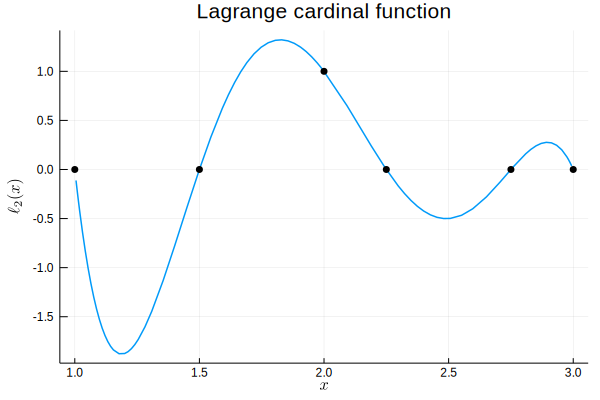

In [3]:
phi = x -> prod(x-t[i+1] for i=[0:k-1;k+1:n])
ell_k = x -> phi(x) / phi(t[k+1])

plot(ell_k,1,3)
scatter!(t,[zeros(k);1;zeros(n-k)],color=:black,
    xaxis=(L"x"), yaxis=(L"\ell_2(x)"),
    title="Lagrange cardinal function",legend=:none)

Observe that $\ell_k$ is _not_ between zero and one everywhere between the nodes. 

# Example 9.1.3

Consider the problem of interpolating $\log(x)$ at these nodes:

In [4]:
 t = [ 1, 1.6, 1.9, 2.7, 3 ];

Here $n=4$ and $f^{(5)}(\xi) = 4!/\xi^5$. For $\xi\in[1,3]$ we can say that $|f^{(5)}(\xi)| \le 4!$. Hence 

$$ |f(x)-p(x)| \le \frac{1}{5} \Phi(x).$$

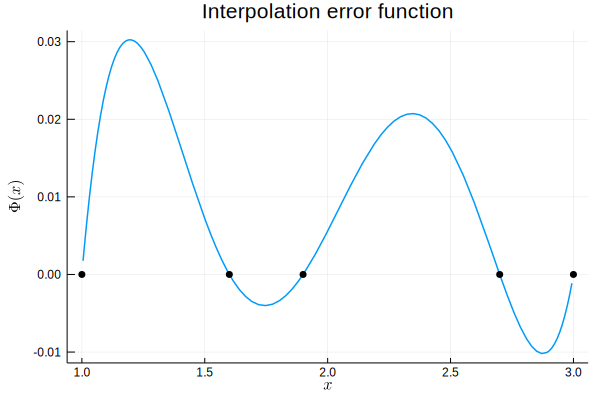

In [5]:
Phi = x -> prod(x-ti for ti=t)
plot(x->Phi(x)/5,1,3)
scatter!(t,zeros(size(t)),color=:black,
    xaxis=(L"x"), yaxis=(L"\Phi(x)"),
    title="Interpolation error function",legend=:none)

The error bound has one local extreme point between each consecutive pair of nodes.

# Example 9.2.2

We use $n=3$ and $n=6$ with equally spaced nodes for the function $\sin(e^{2x})$ over $[0,1]$.

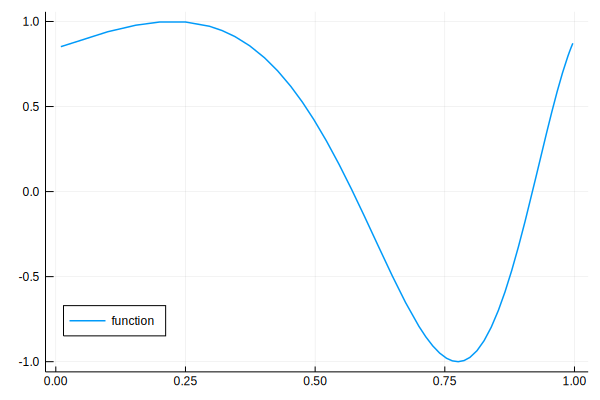

In [6]:
f = x -> sin(exp(2*x))
plot(f,0,1,label="function",legend=:bottomleft)

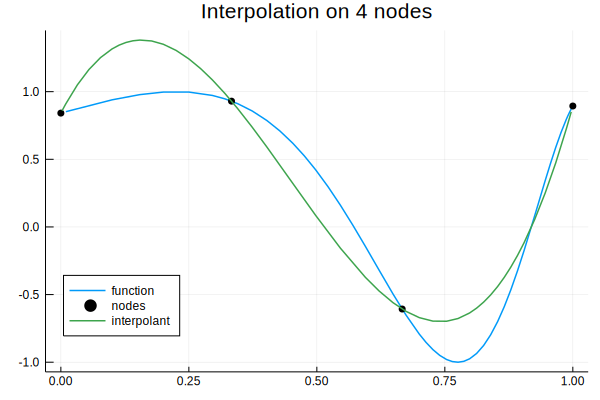

In [7]:
t = (0:3)/3 
y = f.(t)
p = FNC.polyinterp(t,y)

scatter!(t,y,color=:black,label="nodes")
plot!(p,0,1,label="interpolant",
    title="Interpolation on 4 nodes")

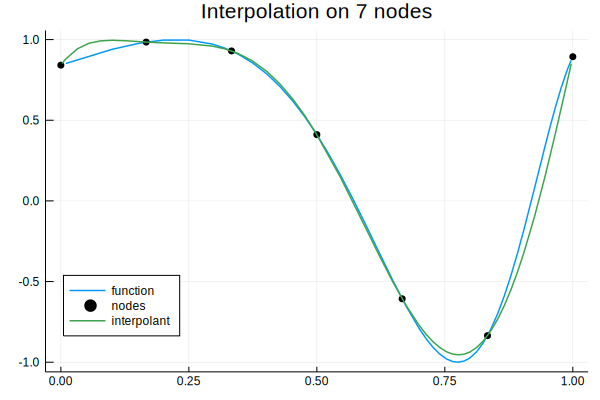

In [8]:
plot(f,0,1,label="function",legend=:bottomleft)
t = (0:6)/6 
y = f.(t)
p = FNC.polyinterp(t,y)
scatter!(t,y,color=:black,label="nodes")
plot!(p,0,1,label="interpolant",title="Interpolation on 7 nodes")

The curves always intersect at the interpolation nodes. 

# Example 9.3.1

We choose a function over the interval $[0,1]$. 

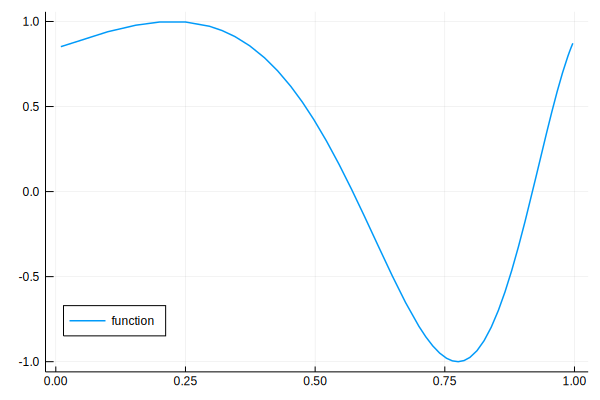

In [9]:
f = x -> sin(exp(2*x))
plot(f,0,1,label="function",legend=:bottomleft)

We interpolate it at equally spaced nodes for increasing values of $n$. We will sample the interpolant at a large number of points in order to estimate the interpolation error. 

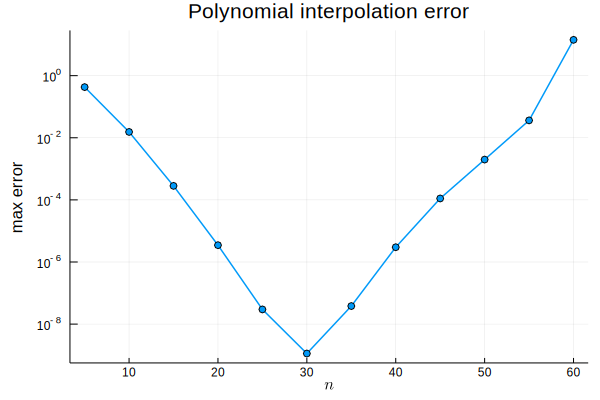

In [10]:
n = (5:5:60)
err = zeros(size(n))
x = range(0,stop=1,length=1001)      # for measuring error
for (k,n) = enumerate(n) 
  t = range(0,stop=1,length=n+1)     # equally spaced nodes
  y = f.(t)                          # interpolation data
  p = FNC.polyinterp(t,y)
  err[k] = maximum( @. abs(f(x)-p(x)) )
end

plot(n,err,m=:o,label="", 
    xaxis=(L"n"),yaxis=(:log10,"max error"),
    title="Polynomial interpolation error")

Initially the error decreases exponentially, i.e. as $O(K^{-n})$ for some $K>1$. However, around $n=30$ the error starts to _grow_ exponentially. 

# Example 9.3.2

We plot $|\Phi(x)|$ over the interval $[-1,1]$ with equispaced nodes for different values of $n$. 

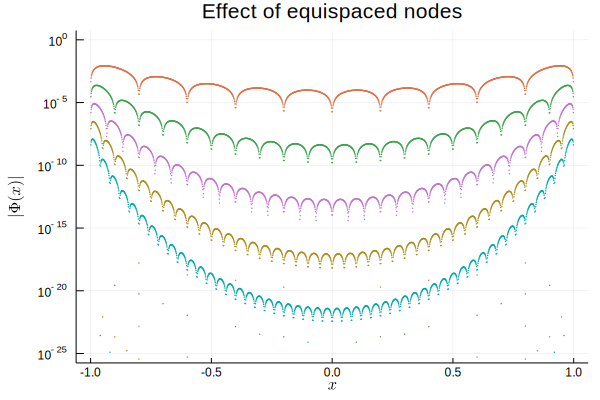

In [11]:
plot([],[],xaxis=(L"x"),yaxis=(:log10,L"|\Phi(x)|",[1e-25,1]),legend=:none)

x = range(-1,stop=1,length=1601)
for n = 10:10:50
    t = range(-1,stop=1,length=n+1)
    Phi = [ prod(xk.-t) for xk in x ]
    scatter!(x,abs.(Phi),m=(1,stroke(0)))
end
title!("Effect of equispaced nodes")

(Each time $\Phi$ passes through zero at an interpolation node, the value on the log scale should go to $-\infty$, which explains the numerous cusps on the curves.) Two observations are important: First, the size of $|\Phi|$ decreases exponentially at each fixed location in the interval (because the spacing between curves is constant for constant increments of $n$). Second, $|\Phi|$ is larger at the ends of the interval than in the middle, by an exponentially growing factor.

# Example 9.3.3

This function has infinitely many continuous derivatives on the entire real line and looks very easy to approximate over $[-1,1]$.

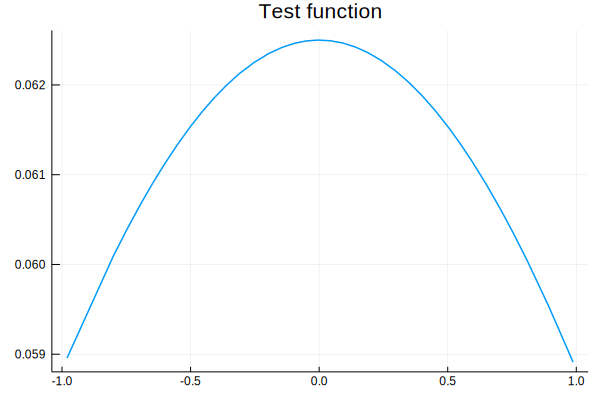

In [12]:
f = x -> 1/(x^2 + 16)
plot(f,-1,1,title="Test function",legend=:none)

We start by doing polynomial interpolation for some rather small values of $n$.

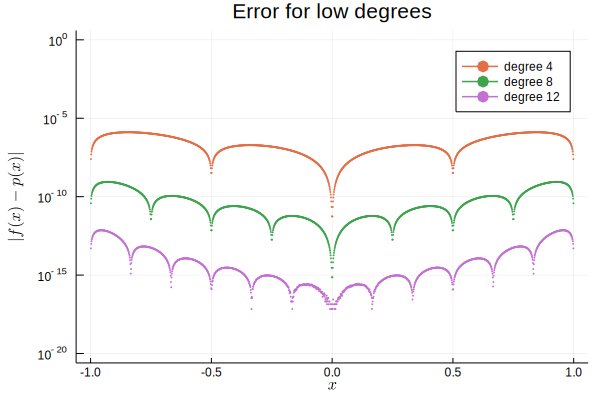

In [13]:
plot([],[],label="",xaxis=(L"x"),yaxis=(:log10,L"|f(x)-p(x)|",[1e-20,1]))

x = range(-1,stop=1,length=1601)
n = 4:4:12
for (k,n) = enumerate(n)
    t = range(-1,stop=1,length=n+1)     # equally spaced nodes
    y = f.(t)                          # interpolation data
    p = FNC.polyinterp(t,y)
    err = @.abs(f(x)-p(x))
    plot!(x,err,m=(1,:o,stroke(0)),label="degree $n")
end
title!("Error for low degrees")

The convergence so far appears rather good, though not uniformly so. Now watch what happens as we continue to increase the degree.

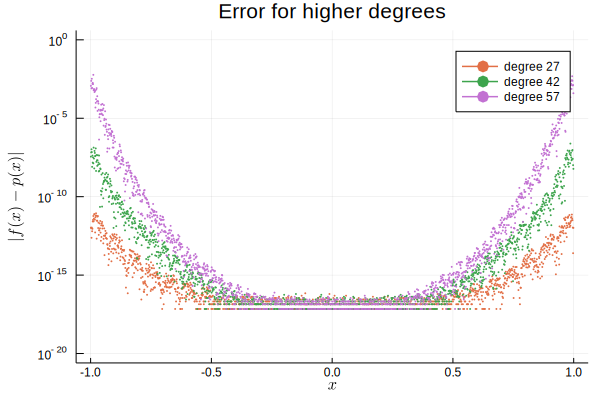

In [14]:
n = @. 12 + 15*(1:3)
plot([],[],label="",xaxis=(L"x"),yaxis=(:log10,L"|f(x)-p(x)|",[1e-20,1]))

for (k,n) = enumerate(n)
    t = range(-1,stop=1,length=n+1)     # equally spaced nodes
    y = f.(t)                          # interpolation data
    p = FNC.polyinterp(t,y)
    err = @.abs(f(x)-p(x))
    plot!(x,err,m=(1,:o,stroke(0)),label="degree $n")
end
title!("Error for higher degrees")

The convergence in the middle can't get any better than machine precision. So maintaining the growing gap between the center and the ends pushes the error curves upward exponentially fast at the ends, wrecking the convergence.

# Example 9.3.4

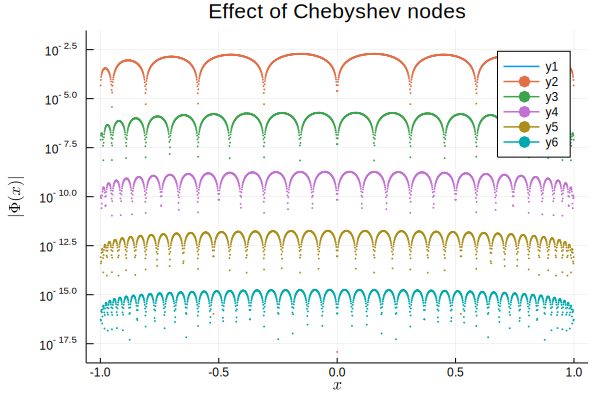

In [15]:
plot([],[],xaxis=(L"x"),yaxis=(:log10,L"|\Phi(x)|",[1e-18,1e-2]))
x = LinRange(-1,1,1601)
for n = 10:10:50
    theta = pi*(0:n)/n
    t = @. -cos(theta)                   
    Phi = [ prod(xk.-t) for xk in x ]
    plot!(x,abs.(Phi),m=(1,:o,stroke(0)))
end
title!("Effect of Chebyshev nodes")

The convergence is a bit slower in the middle than with equally spaced points, but far more uniform over the entire interval, which is the key to global convergence. 

# Example 9.3.5

This function has infinitely many continuous derivatives on the entire real line and looks very easy to approximate over $[-1,1]$.  

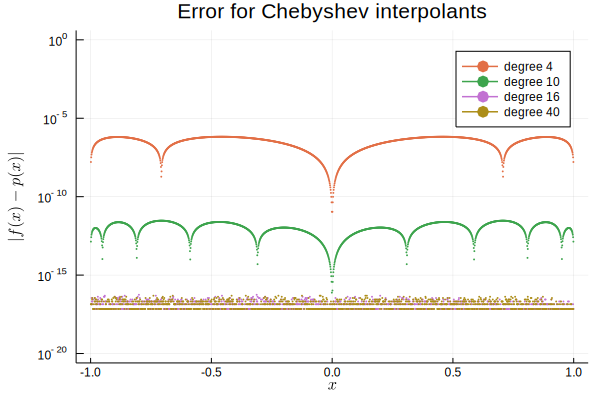

In [16]:
f = x -> 1/(x^2 + 16)

plot([],[],label="",xaxis=(L"x"),yaxis=(:log10,L"|f(x)-p(x)|",[1e-20,1]))
x = LinRange(-1,1,1601)
for (k,n) = enumerate([4,10,16,40])
    t = [ -cos(pi*k/n) for k=0:n ]
    y = f.(t)                           # interpolation data
    p = FNC.polyinterp(t,y)
    err = @.abs(f(x)-p(x))
    plot!(x,err,m=(1,:o,stroke(0)),label="degree $n")
end
title!("Error for Chebyshev interpolants")

By degree 16 the error is uniformly within machine epsilon. Note that even as the degree continues to increase, the error near the ends does not grow as with the Runge phenomenon for equally spaced nodes.

# Example 9.4.1

Let's approximate $e^x$ over the interval $[-1,1]$. We can sample it at, say, 40 points, and find the best-fitting straight line to that data. 

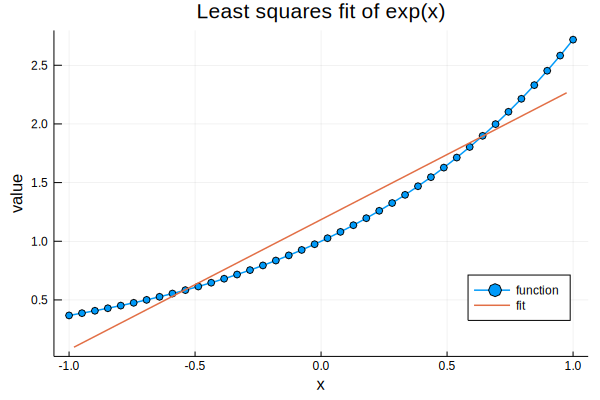

In [17]:
t = LinRange(-1,1,40)
y = exp.(t)
plot(t,y,m=:o,label="function")

V = [ ti^j for ti in t, j=0:1 ]
c = V\y
plot!(t->c[1]+c[2]*t,-1,1,label="fit",
    xaxis=("x"),yaxis=("value"),title="Least squares fit of exp(x)",leg=:bottomright)

There's nothing special about 40 points. By choosing more we get closer to the true function $e^x$.

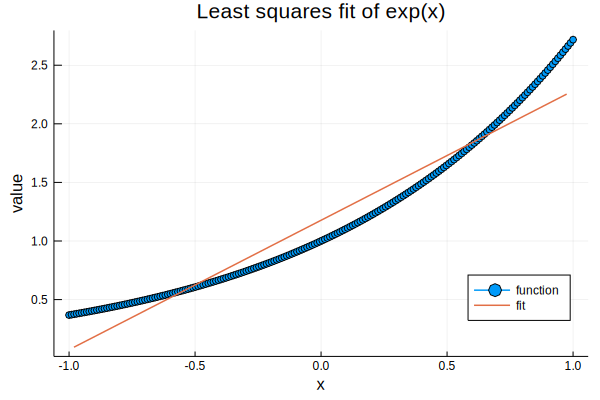

In [18]:
t = LinRange(-1,1,200)
y = exp.(t)
plot(t,y,m=:o,label="function")

V = [ ti^j for ti in t, j=0:1 ]
c = V\y
plot!(t->c[1]+c[2]*t,-1,1,label="fit",
    xaxis=("x"),yaxis=("value"),title="Least squares fit of exp(x)",leg=:bottomright)

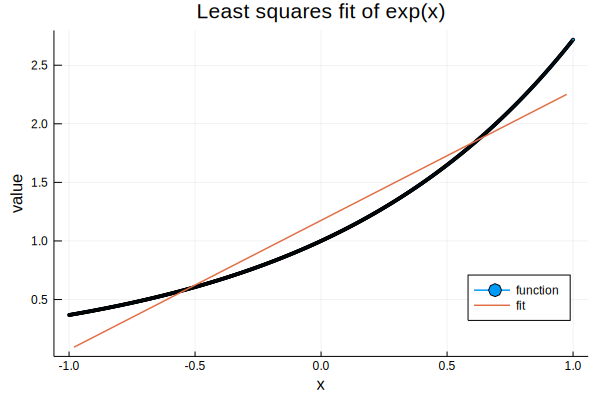

In [19]:
t = LinRange(-1,1,1000)
y = exp.(t)
plot(t,y,m=(:o,1),label="function")

V = [ ti^j for ti in t, j=0:1 ]
c = V\y
plot!(t->c[1]+c[2]*t,-1,1,label="fit",
    xaxis=("x"),yaxis=("value"),title="Least squares fit of exp(x)",leg=:bottomright)

It's quite plausible that the coefficients of the best-fit line are approaching a limit as the number of nodes goes to infinity. 

# Example 9.5.1

We get a cardinal function if we use data that is one at a node and zero at the others. 

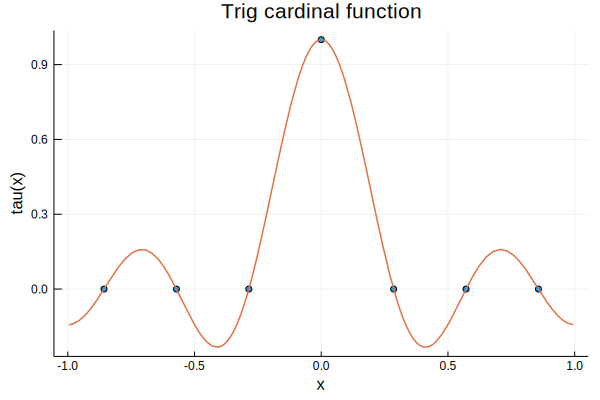

In [20]:
N = 7;  n = Int((N-1)/2);
t = @. 2*(-n:n)/N
y = zeros(N);  y[n+1] = 1;

scatter(t,y,
    xaxis=("x"),yaxis=("tau(x)"),title="Trig cardinal function",leg=:none)

p = FNC.triginterp(t,y)
plot!(p,-1,1)

Here is a 2-periodic function and one of its interpolants.

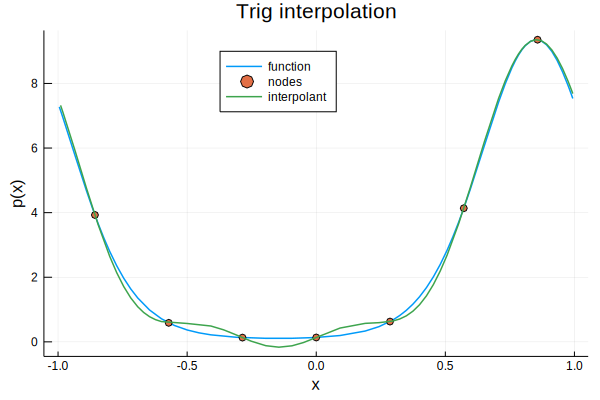

In [21]:
f = x -> exp(sin(pi*x)-2*cos(pi*x))

plot(f,-1,1,label="function",
    xaxis=("x"), yaxis=("p(x)"),
    title="Trig interpolation",leg=:top)  

y = f.(t);  plot!(t,y,m=:o,l=nothing,label="nodes")
plot!(FNC.triginterp(t,y),-1,1,label="interpolant")

The convergence of the interpolant is exponential (spectral). We let $N$ go needlessly large here in order to demonstrate that unlike polynomials, trigonometric interpolation is stable on equally spaced nodes.

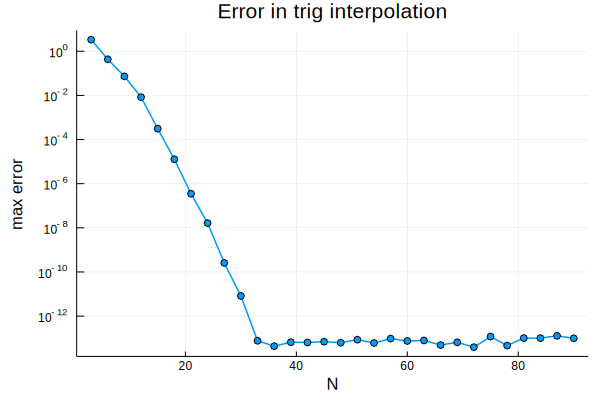

In [22]:
N = 3:3:90
err = zeros(size(N))

x = LinRange(-1,1,1601)  # for measuring error
for (k,N) = enumerate(N)
    n = (N-1)/2;   t = @. 2*(-n:n)/N;
    p = FNC.triginterp(t,f.(t))
    err[k] = maximum(@. abs(f(x)-p(x)) )
end

plot(N,err,m=:o,
    title="Error in trig interpolation",leg=:none,xaxis=("N"), yaxis=(:log10,"max error") )

# Example 9.5.2

This function has two distinct frequencies. 

In [23]:
f = x -> 3*cos(5*pi*x) - exp(2im*pi*x);

We set up to use the built-in `fft`. Note how the definition of the nodes has changed. 

In [24]:
n = 10;  N = 2n+1;
t = [ 2j/N for j=0:N-1 ]      # nodes in [0,2)
y = f.(t);

We perform Fourier analysis using `fft` and then examine the coefficients.

In [25]:
c = fft(y)/N

21-element Array{Complex{Float64},1}:
 -4.123685520036296e-16 - 1.0044874984703797e-16im
 -5.498247360048394e-16 - 1.9842029721797426e-16im
    -1.0000000000000002 - 8.706562339992313e-17im 
 -5.885791231251621e-16 - 1.755351086541556e-16im 
 -1.171043311406427e-16 + 4.012145121264691e-17im 
     1.4999999999999996 - 1.7818447470955614e-15im
  7.564730323504938e-16 - 5.2642401259614e-16im   
 4.2294210461910723e-16 + 4.503424429642884e-16im 
 -4.051605659606699e-17 - 5.331091682429137e-16im 
  6.156692766710495e-16 - 4.336373261824172e-16im 
 2.0818383974186774e-16 + 3.23049180503545e-16im  
  2.925765893638395e-16 - 2.340630606122975e-16im 
  5.435679850552667e-16 + 2.495113239811519e-16im 
 1.2667686283706214e-16 + 5.134387559233535e-16im 
  4.359147003539163e-16 - 4.895968511551833e-16im 
  8.181783306903294e-16 + 5.295676027554136e-16im 
     1.4999999999999993 + 1.6462732419952283e-15im
 -1.538118527030945e-16 - 1.5546273555983951e-16im
 -4.006733200881597e-16 + 2.34921665618154e-

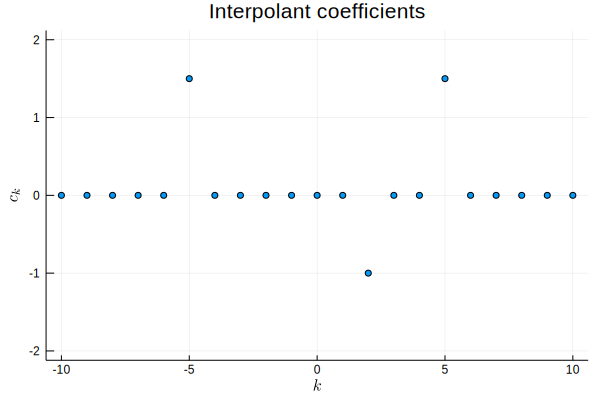

In [26]:
k = [0:n;-n:-1]    # frequency ordering 

scatter(k,real(c),
    xaxis=(L"k",[-n,n]),yaxis=(L"c_k",[-2,2]), 
    title="Interpolant coefficients",leg=:none)

Note that $1.5 e^{5i\pi x}+1.5 e^{-5i\pi x} = 3 \cos(5\pi x)$ by Euler's formula, so this result is sensible.

Fourier's greatest contribution to mathematics was to point out that every periodic function is just a combination of frequencies---infinitely many of them in general, but truncated for computational use. 

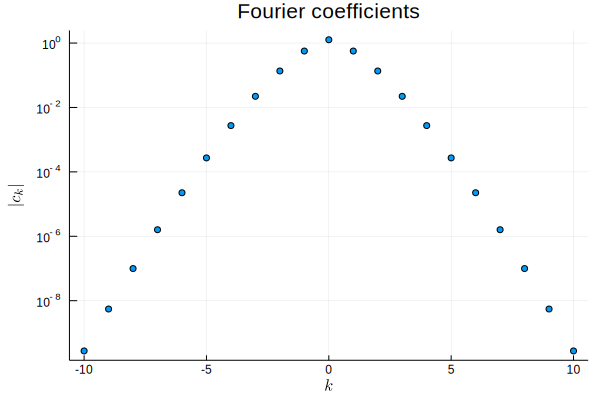

In [27]:
f = x -> exp( sin(pi*x) );
c = fft(f.(t))/N

scatter(k,abs.(c),
    xaxis=(L"k",[-n,n]),yaxis=(L"|c_k|",:log10), 
    title="Fourier coefficients",leg=:none)

The Fourier coefficients of smooth functions decay exponentially in magnitude as a function of the frequency. This decay rate is directly linked to the convergence of the interpolation error.

# Example 9.6.1

We use the trapezoidal integration formula to compute the perimeter of an ellipse with semi-axes 1 and 1/2. Parameterizing the ellipse as $x=\cos \pi t$, $y=\frac{1}{2}\sin \pi t$ leads to the integral 

$$\int_{-1}^1 \pi\sqrt{ \cos^2(\pi t) + \tfrac{1}{4}\sin^2(\pi t)}\,dt.$$ 

In [28]:
f = t->pi*sqrt( cos(pi*t)^2+sin(pi*t)^2/4 );
N = 4:4:60
C = zeros(size(N))

for (i,N) = enumerate(N)
    h = 2/N
    t = @. h*(0:N-1)-1
    C[i] = h*sum(f.(t))
end
@show perimeter = C[end];

perimeter = C[end] = 4.844224110273838


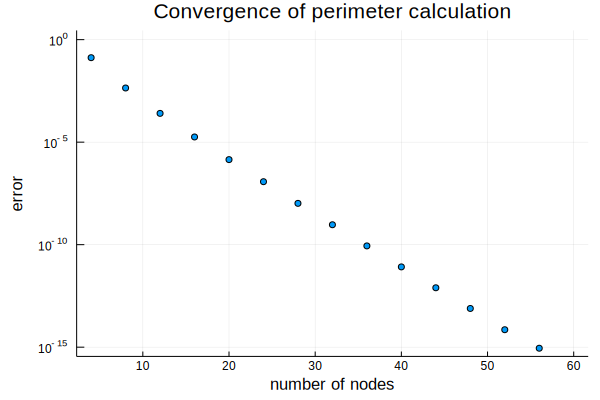

In [29]:
err = @. abs(C-perimeter)
plot(N,err,m=3,
    title="Convergence of perimeter calculation",leg=:none,
    xaxis=("number of nodes"), yaxis=(:log10,"error",[1e-15,1]) )

The approximations gain about one digit of accuracy for each constant increase in $N$, consistent with geometric (linear) convergence. 

# Example 9.6.3

First consider the integral  $$\int_{-1}^1 \frac{1}{1+4x^2} \, dx = \arctan(2).$$ 

In [30]:
f = x->1/(1+4*x^2);
exact = atan(2);

We compare the two spectral integration methods for a range of $n$ values.

In [31]:
n = 8:4:96
errCC = zeros(size(n))
errGL = zeros(size(n))
for (k,n) = enumerate(n)
  errCC[k] = exact - FNC.ccint(f,n)[1]
  errGL[k] = exact - FNC.glint(f,n)[1]
end

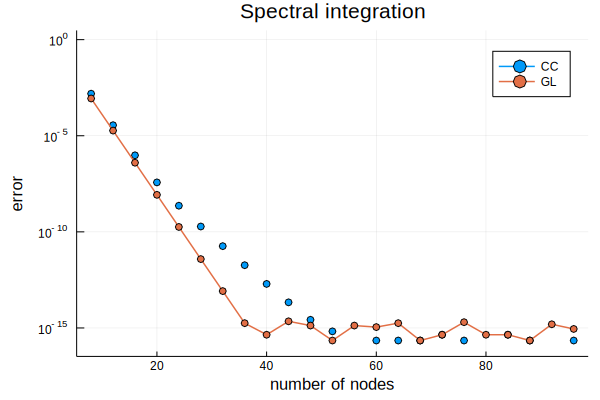

In [32]:
plot(n,[abs.(errCC) abs.(errGL)],m=:o,label=["CC" "GL"],
    xaxis=("number of nodes"), yaxis=(:log10,"error",[1e-16,1]), 
    title="Spectral integration")

(The missing dots are where the error is exactly zero.) Gauss--Legendre does converge faster here, but at something less than twice the rate. Now we try a more sharply peaked integrand:

 $$\int_{-1}^1 \frac{1}{1+16x^2} \, dx = \frac{1}{2}\arctan(4).$$ 

In [33]:
f = x->1/(1+16*x^2);
exact = atan(4)/2;

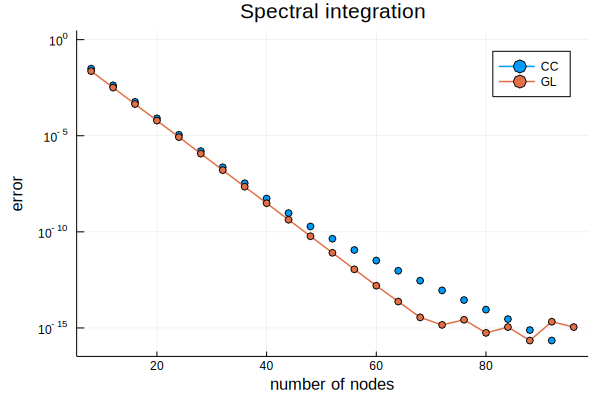

In [34]:
n = 8:4:96
errCC = zeros(size(n))
errGL = zeros(size(n))
for (k,n) = enumerate(n)
  errCC[k] = exact - FNC.ccint(f,n)[1]
  errGL[k] = exact - FNC.glint(f,n)[1]
end

plot(n,[abs.(errCC) abs.(errGL)],m=:o,label=["CC" "GL"],
    xaxis=("number of nodes"), yaxis=(:log10,"error",[1e-16,1]), 
    title="Spectral integration")

The two are very close until about $n=40$, when the Clenshaw--Curtis method slows down.

Now let's compare the spectral performance to that of our earlier adaptive method in `adaptquad`. We will specify varying error tolerances and record the error as well as the total number of evaluations of $f$.

In [35]:
tol = 10 .^(-2.0:-2:-14)
n = zeros(size(tol))  
errAdapt = zeros(size(tol))
for (k,tol) = enumerate(tol)
  Q,t = FNC.intadapt(f,-1,1,tol)
  errAdapt[k] = exact - Q
  n[k] = length(t)
end

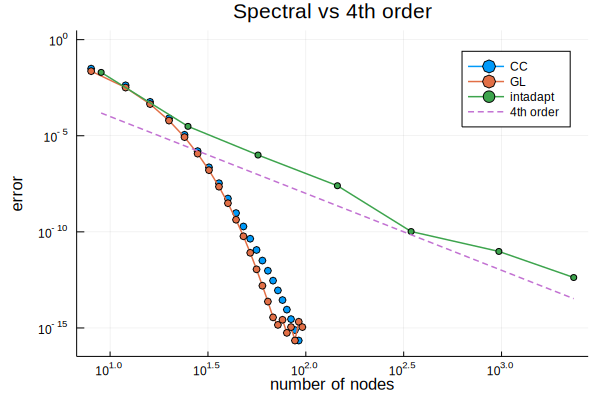

In [36]:
plot!(n,abs.(errAdapt),m=3,label="intadapt")
plot!(n,n.^(-4),l=:dash,label="4th order",
        xaxis=(:log10), title="Spectral vs 4th order" )

At the core of `intadapt` is a fourth-order formula, and the results track that rate closely. For all but the most relaxed error tolerances, both spectral methods are far more efficient than the low-order counterpart.

# Example 9.7.2

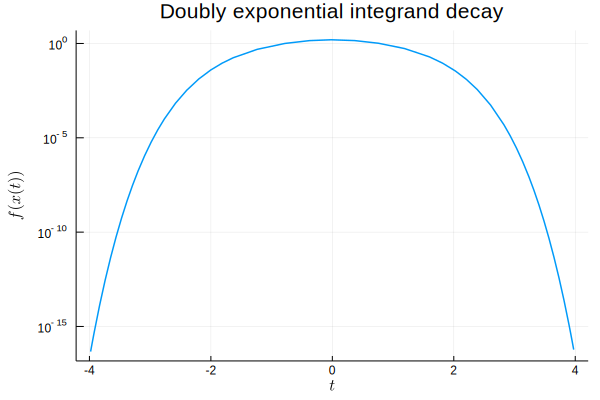

In [37]:
f = x -> 1/(1+x^2)
x = t -> sinh(pi*sinh(t)/2);
chain = t -> pi/2*cosh(t)*cosh(pi*sinh(t)/2);
integrand = t -> f(x(t))*chain(t);

plot(integrand,-4,4,
    xaxis=(L"t"),yaxis=(:log10,L"f(x(t))"),
    title="Doubly exponential integrand decay",leg=:none)

This graph suggests that we may integrate $t$ from $-4$ to $4$ and capture all of the integrand values that are larger than machine epsilon.

# Example 9.7.3

In [38]:
f = x -> 1/(1+x^2);

h = 10 .^range(-3,stop=-1,length=60)
M = 10 .^range(3,stop=16,length=60)

I = [ FNC.intde(f,h,M)[1] for h=h, M=M ]
err = @. abs(I-pi);

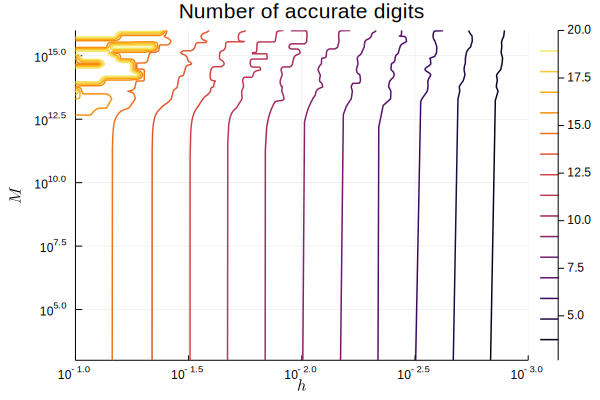

In [39]:
contour(h,M,-log.(10,err.+1e-20),
    xflip=true,xaxis=(L"h",:log10),yaxis=(L"M",:log10),
    title="Number of accurate digits")

As predicted, the error can't much beat $1/M$. Even for very large $M$, however, not many nodes are needed, as seen in the very weak dependence of the accuracy on $h$. For instance,

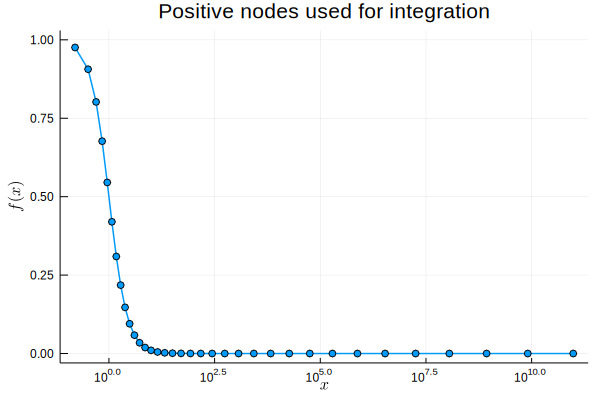

In [40]:
I,x = FNC.intde(f,0.1,1e10)
err = abs(pi-I)
number_of_nodes = length(x)

xpos = @. (x>0)
plot(x[xpos],f.(x[xpos]),m=:o,
    xaxis=(L"x",:log10), yaxis=(L"f(x)",[0,1]),
    title="Positive nodes used for integration",leg=:none)

# Example 9.7.4

In [41]:
I,x = FNC.intadapt(sqrt,0,1,1e-10)
@show err = I - 2/3;
@show number_of_nodes = length(x);

err = I - 2 / 3 = -1.907372815246333e-9
number_of_nodes = length(x) = 221


The adaptive integrator was reasonably successful. But if we integrate $1/\sqrt{x}$, which in unbounded at the origin, the number of nodes goes up dramatically. 

In [42]:
I,x = FNC.intadapt(x -> 1/sqrt(x),eps(),1,1e-10)
@show err = I - 2;
@show number_of_nodes = length(x);

err = I - 2 = -2.4282074573278578e-8
number_of_nodes = length(x) = 973


The nodes are packed in very closely at the origin; in fact they are placed with exponential spacing.

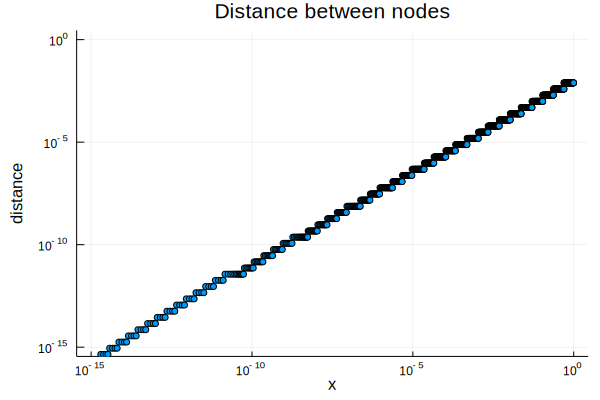

In [43]:
scatter(x[1:end-1],diff(x),
    xaxis=("x",:log10,[1e-15,1]),yaxis=(:log10,"distance",[1e-15,1]),
    title="Distance between nodes",leg=:none)

# Example 9.7.5

We return to the problem of computing $\int_0^1 \sqrt{x}\,dx$. In order to apply `intsing`, we first have to transform the interval of integration to $[-1,1]$. We can do this through $z=2x-1$. Note that

$$\int_0^1 \sqrt{x}\,dx = \int_{-1}^1 \sqrt{\tfrac{1}{2}(z+1)}\cdot \tfrac{1}{2}dz.$$

In [44]:
f = z -> sqrt((1+z)/2)
I,z = FNC.intsing(f,0.1,1e-12)

@show err = I/2 - 2/3;
@show number_of_nodes = length(z);

err = I / 2 - 2 / 3 = -7.061018436615996e-14
number_of_nodes = length(z) = 59


The integration required very few nodes. For the more difficult integral of $1/\sqrt{x}$, the results are limited by how accurately we can represent $-1+\delta$.

In [45]:
f = z -> 1/sqrt((1+z)/2)
I,z = FNC.intsing(f,0.1,1e-14)

@show err = I/2 - 2;
@show number_of_nodes = length(z);

err = I / 2 - 2 = -2.0377771914326104e-8
number_of_nodes = length(z) = 63


If we make $\delta$ any smaller, the outermost trapezoid nodes will be indistinguishable from $z=\pm 1$, i.e. the exact endpoints of the interval. We would need to use special code to evaluate $f$ indirectly in the limits $t\to \pm \infty$. 